# CDC Mortality Data

All data was pulled via [CDC Wonder](https://wonder.cdc.gov/controller/datarequest/D140;jsessionid=6168107B9517D078CF8CB7403852F177) and information about the data can be found [in this link](https://wonder.cdc.gov/wonder/help/ucd.html#).

In [177]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

Because CDC Wonder limits result size, several exports subset by state were required. The first 5 files contain 9 states worth of data and 6th has 6 (total of 51 including District of Columbia).  

In [20]:
deaths01 = pd.read_csv("../data_raw/mortality_ages_0-10.txt", sep = "\t", encoding = "ISO-8859-1")
deaths02 = pd.read_csv("../data_raw/mortality_ages_11-15.txt", sep = "\t", encoding = "ISO-8859-1")
deaths03 = pd.read_csv("../data_raw/mortality_ages_16-20.txt", sep = "\t", encoding = "ISO-8859-1")
deaths04 = pd.read_csv("../data_raw/mortality_ages_21-25.txt", sep = "\t", encoding = "ISO-8859-1")
deaths05 = pd.read_csv("../data_raw/mortality_ages_26-30.txt", sep = "\t", encoding = "ISO-8859-1")
deaths06 = pd.read_csv("../data_raw/mortality_ages_31-35.txt", sep = "\t", encoding = "ISO-8859-1")
deaths07 = pd.read_csv("../data_raw/mortality_ages_36-40.txt", sep = "\t", encoding = "ISO-8859-1")
deaths08 = pd.read_csv("../data_raw/mortality_ages_41-45.txt", sep = "\t", encoding = "ISO-8859-1")
deaths09 = pd.read_csv("../data_raw/mortality_ages_46-50.txt", sep = "\t", encoding = "ISO-8859-1")
deaths10 = pd.read_csv("../data_raw/mortality_ages_51-55.txt", sep = "\t", encoding = "ISO-8859-1")
deaths11 = pd.read_csv("../data_raw/mortality_ages_56-60.txt", sep = "\t", encoding = "ISO-8859-1")
deaths12 = pd.read_csv("../data_raw/mortality_ages_61-65.txt", sep = "\t", encoding = "ISO-8859-1")
deaths13 = pd.read_csv("../data_raw/mortality_ages_66-70.txt", sep = "\t", encoding = "ISO-8859-1")
deaths14 = pd.read_csv("../data_raw/mortality_ages_71-75.txt", sep = "\t", encoding = "ISO-8859-1")
deaths15 = pd.read_csv("../data_raw/mortality_ages_76-80.txt", sep = "\t", encoding = "ISO-8859-1")
deaths16 = pd.read_csv("../data_raw/mortality_ages_81-85.txt", sep = "\t", encoding = "ISO-8859-1")
deaths17 = pd.read_csv("../data_raw/mortality_ages_86-90.txt", sep = "\t", encoding = "ISO-8859-1")
deaths18 = pd.read_csv("../data_raw/mortality_ages_91-95.txt", sep = "\t", encoding = "ISO-8859-1")
deaths19 = pd.read_csv("../data_raw/mortality_ages_96-100_plus.txt", sep = "\t", encoding = "ISO-8859-1")

Binding the datasets together:

In [22]:
deaths = pd.concat([deaths01, deaths02, deaths03, deaths04, deaths05, deaths06, deaths07, deaths08, deaths09,
                   deaths10, deaths11, deaths12, deaths13, deaths14, deaths15, deaths16, deaths17, deaths18,
                   deaths19])

With the data concatenated, the contents now need to be explored:

In [23]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205474 entries, 0 to 7632
Data columns (total 14 columns):
Notes                                               0 non-null float64
Single-Year Ages                                    205474 non-null object
Single-Year Ages Code                               205474 non-null int64
Gender                                              205474 non-null object
Gender Code                                         205474 non-null object
Race                                                205474 non-null object
Race Code                                           205474 non-null object
Injury Mechanism & All Other Leading Causes         205474 non-null object
Injury Mechanism & All Other Leading Causes Code    205474 non-null object
Cause of death                                      205474 non-null object
Cause of death Code                                 205474 non-null object
Deaths                                              205474 non-null int

Exploring what kinds of values are in each column:

In [25]:
for c in deaths.columns:
    print("---- %s ---" % c)
    print(deaths[c].value_counts())

---- Notes ---
Series([], Name: Notes, dtype: int64)
---- Single-Year Ages ---
71 years    3551
70 years    3536
69 years    3493
75 years    3485
76 years    3452
68 years    3451
67 years    3448
66 years    3440
77 years    3426
63 years    3406
65 years    3397
74 years    3385
72 years    3364
73 years    3363
64 years    3346
82 years    3345
62 years    3335
80 years    3325
79 years    3320
61 years    3318
83 years    3301
78 years    3300
81 years    3284
60 years    3276
59 years    3225
84 years    3208
85 years    3189
86 years    3178
58 years    3149
87 years    3122
            ... 
29 years    1255
99 years    1234
28 years    1234
27 years    1198
26 years    1072
25 years    1040
24 years     988
23 years     926
22 years     894
21 years     840
20 years     765
18 years     721
1 year       715
19 years     712
17 years     620
2 years      533
16 years     505
15 years     482
3 years      428
14 years     406
13 years     367
12 years     367
4 years      352
5 y

Septicaemia, unspecified                                                                                               624
Other ill-defined and unspecified causes of mortality                                                                  622
Pneumonia, unspecified                                                                                                 599
Person injured in unspecified motor-vehicle accident, traffic                                                          598
Acute myocardial infarction, unspecified                                                                               589
Hypertensive heart disease without (congestive) heart failure                                                          582
Atherosclerotic heart disease                                                                                          570
Atherosclerotic cardiovascular disease, so described                                                                   569
Malignant neopla

In [26]:
deaths.columns

Index(['Notes', 'Single-Year Ages', 'Single-Year Ages Code', 'Gender',
       'Gender Code', 'Race', 'Race Code',
       'Injury Mechanism & All Other Leading Causes',
       'Injury Mechanism & All Other Leading Causes Code', 'Cause of death',
       'Cause of death Code', 'Deaths', 'Population', 'Crude Rate'],
      dtype='object')

**Findings** 
* The Notes column is blank
* "Single-Year Ages" includes the superfluous ...years" at the end and can be removed
* The other "...Code" columns can be removed
* Crude Rate can be removed
* Population has 'Not Applicable for 37,973 rows (why)

The unneeded columns can be removed:

In [27]:
deaths = deaths[['Single-Year Ages Code', 'Gender', 'Race', 'Injury Mechanism & All Other Leading Causes',
                 'Cause of death', 'Deaths', 'Population']]

Those column names need updating to work better with code:

In [28]:
deaths.columns

Index(['Single-Year Ages Code', 'Gender', 'Race',
       'Injury Mechanism & All Other Leading Causes', 'Cause of death',
       'Deaths', 'Population'],
      dtype='object')

In [29]:
deaths.columns = ['age','gender','race','mechanism_of_death','cause_of_death','deaths','population']

Let's see what's going on with the population 'Not Applicable's:

In [43]:
deaths[deaths.population=="Not Applicable"].sort_values("deaths", ascending = False)

,age,gender,race,mechanism_of_death,cause_of_death,deaths,population
13138,90,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",4236,Not Applicable
853,91,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",4114,Not Applicable
10263,89,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",4000,Not Applicable
7266,88,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",3992,Not Applicable
3540,92,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",3985,Not Applicable
4182,87,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",3754,Not Applicable
6077,93,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",3746,Not Applicable
1202,91,Female,White,Non-Injury: All other diseases (Residual),Unspecified dementia,3666,Not Applicable
13510,90,Female,White,Non-Injury: All other diseases (Residual),Unspecified dementia,3605,Not Applicable
3890,92,Female,White,Non-Injury: All other diseases (Residual),Unspecified dementia,3497,Not Applicable


Perhaps understanding how many deaths would be removed relative to the total would be useful in deciding if it's okay to remove without affecting the data much.

In [44]:
sum(deaths[deaths.population=="Not Applicable"].deaths)

880280

In [45]:
sum(deaths[deaths.population!="Not Applicable"].deaths)

1958781

In [46]:
sum(deaths[deaths.population=="Not Applicable"].deaths)/sum(deaths[deaths.population!="Not Applicable"].deaths)

0.4494019494777619

Hmmm, seems pretty important...  
Interestingly, looks like the ages are all pretty high. Let's investigate.

In [48]:
np.mean(deaths[deaths.population=="Not Applicable"].age)

91.2598161851842

In [49]:
min(deaths[deaths.population=="Not Applicable"].age)

85

The documentation states "Rates are marked as "not applicable" when the population denominator figure is unavailable, such as persons of "not stated" or unknown age or Hispanic origin." In other words, there seems to be 45% of people dying in subsections of the population where the figure is unavailable. Let's check out a complete set for age 99 just to get a sense of what it would mean to remove completely.

In [54]:
deaths[(deaths.age == 99)].sort_values("deaths", ascending = False)

,age,gender,race,mechanism_of_death,cause_of_death,deaths,population
5276,99,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",1171,Not Applicable
5499,99,Female,White,Non-Injury: All other diseases (Residual),Unspecified dementia,1164,Not Applicable
5295,99,Female,White,Non-Injury: Diseases of Heart,Atherosclerotic heart disease,887,Not Applicable
5330,99,Female,White,Non-Injury: Diseases of Heart,Congestive heart failure,524,Not Applicable
5884,99,Male,White,Non-Injury: Diseases of Heart,Atherosclerotic heart disease,330,Not Applicable
5354,99,Female,White,"Non-Injury: Cerebrovascular diseases, includin...","Stroke, not specified as haemorrhage or infarc...",299,Not Applicable
5291,99,Female,White,Non-Injury: Diseases of Heart,"Acute myocardial infarction, unspecified",266,Not Applicable
5402,99,Female,White,Non-Injury: Chronic lower respiratory diseases,"Chronic obstructive pulmonary disease, unspeci...",251,Not Applicable
5509,99,Female,White,Non-Injury: All other diseases (Residual),"Senile degeneration of brain, not elsewhere cl...",246,Not Applicable
6029,99,Male,White,Non-Injury: All other diseases (Residual),Unspecified dementia,233,Not Applicable


That's a tough one. We need population in order to get probability. Can we model population by extending a trend? Let's see if it's feasible for white females with Alzheimer disease, unspecified:

In [57]:
deaths[(deaths.gender == "Female") & 
       (deaths.race == "White") & 
       (deaths.cause_of_death == "Alzheimer disease, unspecified")].sort_values("age", ascending = True)

,age,gender,race,mechanism_of_death,cause_of_death,deaths,population
3109,33,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",1,1649715
4020,43,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,1504739
2771,47,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,1668921
4936,48,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",3,1689064
7131,49,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,1611176
9413,50,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",5,1574932
761,51,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",6,1592707
3188,52,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,1617670
5731,53,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",13,1725344
8388,54,Female,White,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",8,1772170


I wonder if 84 is the cutoff for all gender/race combinations. Let's jump to the extreme of the smallest population group: male American Indian or Alaskan Natives:

In [59]:
deaths[(deaths.gender == "Male") & 
       (deaths.race == "American Indian or Alaska Native") & 
       (deaths.cause_of_death == "Alzheimer disease, unspecified")].sort_values("age", ascending = True)

,age,gender,race,mechanism_of_death,cause_of_death,deaths,population
4397,57,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",1,25323
1549,61,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,22212
11632,64,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",1,18280
1660,66,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,15508
8570,68,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",3,14593
12036,69,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",1,13593
15574,70,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,12635
1735,71,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,12669
8569,73,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",2,9009
11962,74,Male,American Indian or Alaska Native,Non-Injury: Alzheimers disease,"Alzheimer disease, unspecified",4,8249


### Modeling Population Sizes for Age 85+

Well, there you have it.  For ages 85+, we don't have population data. Shouldn't be a big deal though since it should be fairly easy to model. The methodology will be:
1. For each age/race combination, create a vector of population sizes (doesn't matter which mechanism/cause are selected because they all share the same population size). 
2. Generate a best-fit model (likely inverse log) to generate population values out until hitting y = 0
3. For all values >100, sum and put into the 100+ bucket (to match the data)
4. Impute the modeled data over the NAs

To prototype, we'll test on the case of white females. [This documentation](https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/) seems useful for curve fitting.

In [70]:
# grab the first population value for each age, gender, race where age is less than 85
white_female_pop = deaths[(deaths.gender == "Female") & 
       (deaths.race == "White") &
       (deaths.age < 85)].sort_values("age", ascending = True).groupby(["age", "gender", "race"]).first().population

In [82]:
# conver to int (was object due to NAs)
white_female_pop = white_female_pop.astype('int')

In [146]:
x = range(85)
y = white_female_pop

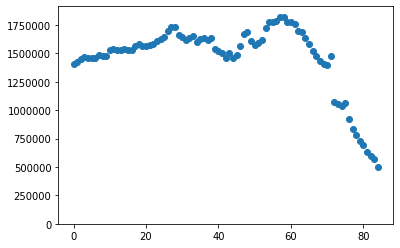

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.ylim(0, max(white_female_pop) * 1.05) # from 0 to a 5% buffer around high end   
ax.plot(x, y, 'o')

In [148]:
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

In [149]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)

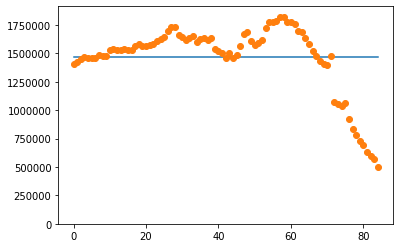

In [150]:
y_fit = f(x, a_, b_, c_, d_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.ylim(0, max(white_female_pop) * 1.05) # from 0 to a 5% buffer around high end  
ax.plot(x, y_fit, '-')
ax.plot(x, y, 'o')

Hmm, looks like we need a different function (was supposed to be S-shaped anyways). Let's try a 5th order polynomial:

In [202]:
x = range(85)

In [203]:
def f(x, a, b, c, d, e, g):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + g*x**5

In [204]:
(a, b_, c_, d_, e_, g_), _ = opt.curve_fit(f, np.array(x), y)

In [205]:
# prediction values
x_pred = range(120)

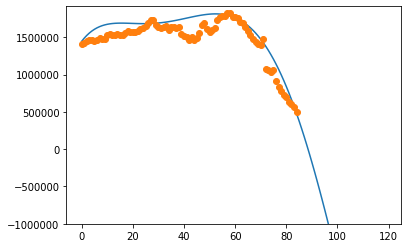

In [206]:
y_fit = f(np.array(x_pred), a_, b_, c_, d_, e_, g_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plt.ylim(-1000000, max(white_female_pop) * 1.05) # from 0 to a 5% buffer around high end  
ax.plot(x_pred, y_fit, '-')
ax.plot(x, y, 'o')

In [207]:
r2_score(y, f(np.array(x), a_, b_, c_, d_, e_, g_))

0.7757209958560642

An R^2 of 0.78 is okay, but what happens if we turn up the polynomial to higher orders?

Write cleaned dataset to .csv

In [30]:
deaths.to_csv('../data/deaths_age_gender_race_mechanism_cause.csv', index = False)